<a href="https://colab.research.google.com/github/Poxxon/Basic-Machine-Learning-Models/blob/main/SellingPriceOfUsedCars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Used car selling price analyzation
## With this model we are going to analyze the selling price of used cars to find out what the selling point is and what matters more!

Walked through with the GeeskforGeeks website. Everything was typed along with the website and not copy and pasted.

This way of self teaching will drastically make me comfortable with the syntax and usability of these models in the future.

Source: https://www.geeksforgeeks.org/analyzing-selling-price-of-used-cars-using-python/

Modules that we are using with this project:

- **`pandas`**: Pandas is an opensource library that allows you to perform data manipulation in Python. Pandas provide an easy way to create, manipulate and wrangle the data.

- **`numpy`**: Numpy is the fundamental package for scientific computing with Python. numpy can be used as an efficient multi-dimensional container of generic data.

- **`matplotlib`**: Matplotlib is a Python 2D plotting library which produces publication quality figures in a variety of formats.

- **`seaborn`**: Seaborn is a Python data-visualization library that is based on matplotlib. Seaborn provides a high-level interface for drawing attractive and informative statistical graphics.

- **`scipy`**: Scipy is a Python-based ecosystem of open-source software for mathematics, science, and engineering.

In [2]:
# Import the above packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp

## Dataset

In [27]:
# Import excel sheet
df = pd.read_csv('sellingPriceUsedCars.csv')

# Remove index column
df = df.iloc[: , 1:]

# Display first 5 rows of the dataset
df.head()

,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495
0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


### Changing header names in the dataset

In [28]:
headers = ["normalized-losses", "make",
           "fuel-type", "aspiration","num-of-doors",
           "body-style","drive-wheels", "engine-location",
           "wheel-base","length", "width","height", "curb-weight",
           "engine-type","num-of-cylinders", "engine-size",
           "fuel-system","bore","stroke", "compression-ratio",
           "horsepower", "peak-rpm","city-mpg","highway-mpg","price"]

df.columns =headers
df.head()

,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
3,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
4,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250


### Finding missing/null values if any

In [32]:
data = df
data.isna().any()
data.isnull().any()

,0
normalized-losses,False
make,False
fuel-type,False
aspiration,False
num-of-doors,False
body-style,False
drive-wheels,False
engine-location,False
wheel-base,False
length,False


### Changing mpg to rest of the world metrics (Canada) - L/100km

In [46]:
# Converting from 'merica metrics to the better metrics (L/100km)
data['city-mpg'] = 235 / data['city-mpg']
data.rename(columns = {'city_mpg': 'city-L / 100km'}, inplace = True)
# Print all the columns to double check the naming
print(data.columns)

# Checking the data type of each column
data.dtypes

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length',
       'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders',
       'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio',
       'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price'],
      dtype='object')


<ipython-input-46-8a9cc3c57e80>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['city-mpg'] = 235 / data['city-mpg']
<ipython-input-46-8a9cc3c57e80>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.rename(columns = {'city_mpg': 'city-L / 100km'}, inplace = True)


,0
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64
length,float64


Price seems to be an object and we have to change that

In [49]:
data.price.unique()

array([16500, 13950, 17450, 15250, 17710, 18920, 23875, 16430, 16925,
       20970, 21105, 24565, 30760, 41315, 36880,  5151,  6295,  6575,
        5572,  6377,  7957,  6229,  6692,  7609,  8558,  8921, 12964,
        6479,  6855,  5399,  6529,  7129,  7295,  7895,  9095,  8845,
       10295, 12945, 10345,  6785, 11048, 32250, 35550, 36000,  5195,
        6095,  6795,  6695,  7395, 10945, 11845, 13645, 15645,  8495,
       10595, 10245, 10795, 11245, 18280, 18344, 25552, 28248, 28176,
       31600, 34184, 35056, 40960, 45400, 16503,  5389,  6189,  6669,
        7689,  9959,  8499, 12629, 14869, 14489,  6989,  8189,  9279,
        5499,  7099,  6649,  6849,  7349,  7299,  7799,  7499,  7999,
        8249,  8949,  9549, 13499, 14399, 17199, 19699, 18399, 11900,
       13200, 12440, 13860, 15580, 16900, 16695, 17075, 16630, 17950,
       18150, 12764, 22018, 32528, 34028, 37028,  9295,  9895, 11850,
       12170, 15040, 15510, 18620,  5118,  7053,  7603,  7126,  7775,
        9960,  9233,

In [50]:
data = data[data.price != '?']
data['price'] = data['price'].astype(int)

data.dtypes

,0
normalized-losses,object
make,object
fuel-type,object
aspiration,object
num-of-doors,object
body-style,object
drive-wheels,object
engine-location,object
wheel-base,float64
length,float64


Normalizing the values

0         Low
1         Low
2         Low
3         Low
4         Low
        ...  
199       Low
200    Medium
201    Medium
202    Medium
203    Medium
Name: price-binned, Length: 200, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'Hight']


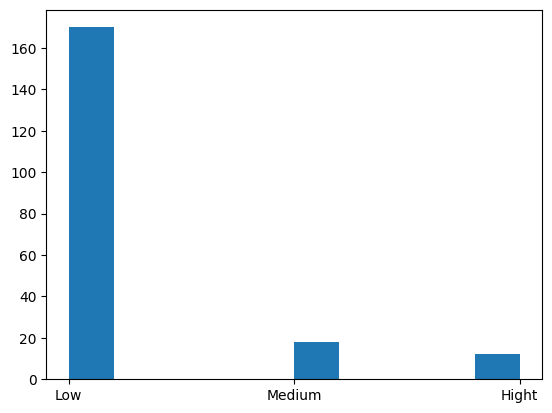

In [52]:
data['length'] = data['length']/data['length'].max()
data['width'] = data['width']/data['width'].max()
data['height'] = data['height']/data['height'].max()

# Binning - grouping values
bins = np.linspace(min(data['price']), max(data['price']), 4)
group_names = ['Low', 'Medium', 'Hight']
data['price-binned'] = pd.cut(data['price'], bins,
                              labels = group_names,
                              include_lowest = True)

print(data['price-binned'])
plt.hist(data['price-binned'])
plt.show()

Descriptive analysis of data categorical to numerical

In [53]:
# Categorical to numerical
pd.get_dummies(data['fuel-type']).head()

# Descriptive analysis
# NaN will be skipped
data.describe()

,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,98.848000,0.837232,0.915250,0.899523,2555.705000,126.860000,10.170100,9.937914,30.705000,13205.690000
std,6.038261,0.059333,0.029207,0.040610,518.594552,41.650501,4.014163,2.539415,6.827227,7966.982558
min,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,7.000000,4.795918,16.000000,5118.000000
25%,94.500000,0.800937,0.891319,0.869565,2163.000000,97.750000,8.575000,7.833333,25.000000,7775.000000
50%,97.000000,0.832292,0.909722,0.904682,2414.000000,119.500000,9.000000,9.791667,30.000000,10270.000000
75%,102.400000,0.881788,0.926042,0.928512,2928.250000,142.000000,9.400000,12.368421,34.000000,16500.750000
max,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,23.000000,18.076923,54.000000,45400.000000


## Plotting the data according to the price based on engine size

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


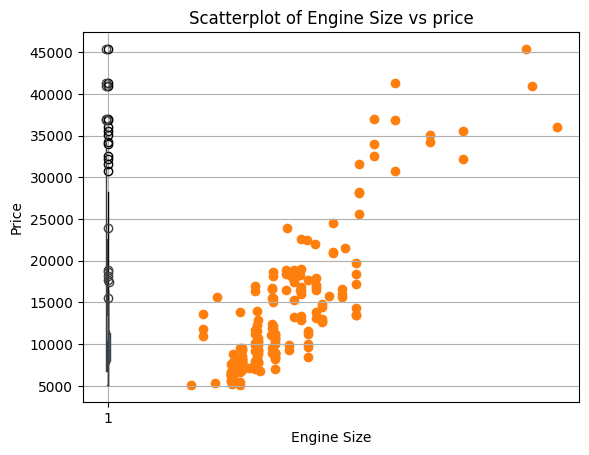

In [56]:
plt.boxplot(data['price'])

# Using seaborn
sb.boxplot(x = 'drive-wheels', y = 'price', data = data)

# Predicting price based on engine size
plt.scatter(data['engine-size'], data['price'])
plt.title('Scatterplot of Engine Size vs price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.grid()
plt.show()

### Grouping data according to wheels, body style and price

In [57]:
test = data[['drive-wheels', 'body-style', 'price']]
data_grp = test.groupby(['drive-wheels', 'body-style'],
                        as_index = False).mean()

data_grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,26563.250000
9,rwd,hardtop,24202.714286


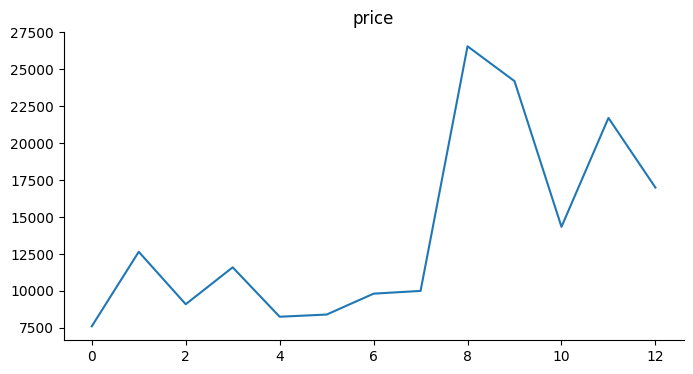

In [59]:
# @title price

data_grp['price'].plot(kind='line', figsize=(8, 4), title='price')
plt.gca().spines[['top', 'right']].set_visible(False)

## Creating a heatmap according to the data obtained by pivot method

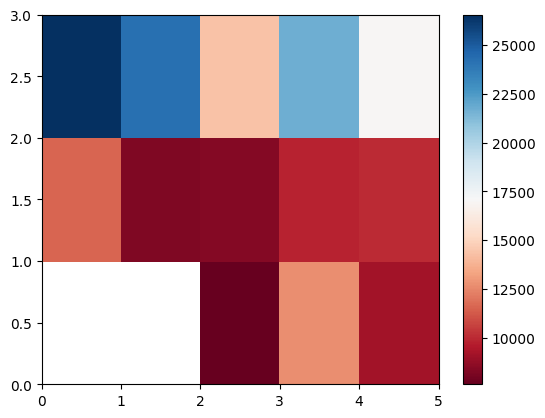

In [61]:
# Pivot method
data_pivot = data_grp.pivot(index = 'drive-wheels',
                            columns = 'body-style')
data_pivot

# Heatmap for visualizing the data
plt.pcolor(data_pivot, cmap = 'RdBu')
plt.colorbar()
plt.show()

## Final Results

<ipython-input-63-dc30a96c7c9e>:8: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  annova_results_l = sp.stats.f_oneway(grouped_annova.get_group('honda')['price'],
<ipython-input-63-dc30a96c7c9e>:9: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  grouped_annova.get_group('subaru')['price'])


F_onewayResult(statistic=0.19744030127462606, pvalue=0.6609478240622193)


(0.0, 53123.723652822395)

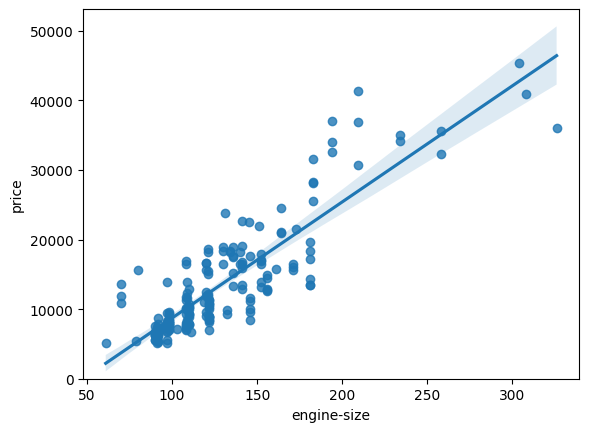

In [63]:
# ANOVA - Analysis of Variance
# returns f-test and p-value
# f-test = variance between sample group means divided by variation within sample group
# p-value = confidence degree

data_annova = data[['make', 'price']]
grouped_annova = data_annova.groupby(['make'])
annova_results_l = sp.stats.f_oneway(grouped_annova.get_group('honda')['price'],
                                     grouped_annova.get_group('subaru')['price'])

print(annova_results_l)

sns.regplot(x = 'engine-size', y = 'price', data = data)
plt.ylim(0, )